<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# info
jupyter notebook: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

selezionare elemeni in array o liste: https://teamtreehouse.com/community/how-do-i-get-the-first-4-and-last-4-items-of-a-list

machine leaenring https://medium.com/botsupply/il-machine-learning-%C3%A8-divertente-parte-1-97d4bce99a06



# GET data from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
PROJECT_ROOT_DIR = "/content/drive/My Drive/Colab Notebooks/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
df = pd.read_csv(csv_file)
df.head()

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [0]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'Nessuna risposta', regex=True)


In [0]:
df = df.replace({'Età in anni compiuti', '75 e oltre'}, {'Età in anni compiuti', 'tra 75 e oltre'} )
from sklearn.preprocessing import OrdinalEncoder
df['giovani'] = np.where(df['Età in anni compiuti']<'tra 25 e 34', 1, 0)
giovani=df[df.giovani==1].copy()
grandi =df[df.giovani==0].copy()
df.head()

# Look into data

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
print(df['Cittadinanza'].value_counts())

# full raw dataset visualization

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
def plot_multiple_choice(question, db, figsize):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=figsize)
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  for i in range (1, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(100*multiple_answar[multiple_answar.columns[i]].sum()/len(db))
  x = np.linspace(0,len(labels),len(labels))
  bp = ax.bar(x, np.array(values))
  plt.xticks(x, labels, rotation='vertical')
  plt.ylabel('percentage [%]')
  return bp

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  import matplotlib.pyplot as plt
  import os
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
show_as_pie = 6
show_as_hist = 40

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  print (df[df.columns[i]].value_counts())
  df["multiple"]=df[df.columns[i]].astype(str).str.find(',')
  if np.max(df["multiple"])>-1:
    plot_multiple_choice(question=df.columns[i], db=df, figsize=(15,5))
  else:
    ordinal_encoder = OrdinalEncoder()
    ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
    labels = np.array(ordinal_encoder.categories_[0])
    if len(ordinal_encoder.categories_[0])<show_as_pie :
      val, _ = np.histogram(ordinated_encoded, bins=len(labels))
      plt.figure(figsize=(5,5))
      plt.pie(val, labels=labels)
    else:
      cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
      if len(cat_num) > show_as_hist:
        cat_num = cat_num[::len(cat_num)//show_as_hist]
        labels = labels[::len(cat_num)//show_as_hist]
      plt.figure(figsize=(15,5))
      plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
      plt.xticks(cat_num-0.5,labels, rotation='vertical')
  plt.show()

tra 15 e 17       382
tra 11 e 14       208
tra 45 e 54       153
tra 18 e 19       120
tra 55 e 64        49
tra 35 e 44        44
tra 25 e 34        36
tra 20 e 24        17
tra 65 e 74         6
tra 75 e oltre      4
Name: Età in anni compiuti, dtype: int64


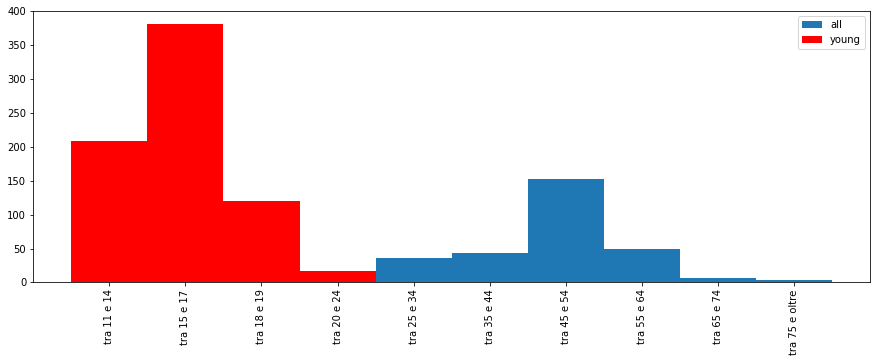

F    645
M    374
Name: Sesso, dtype: int64


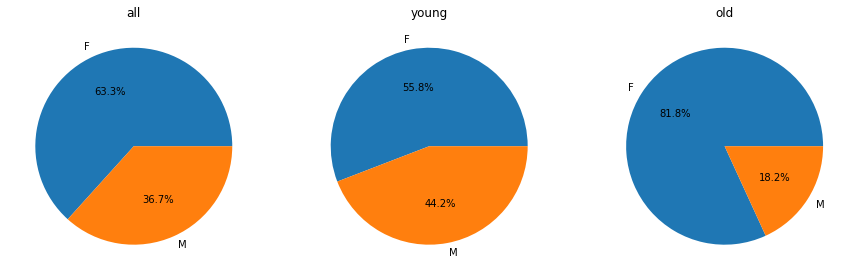

italiana    981
europea      22
altra        16
Name: Cittadinanza, dtype: int64


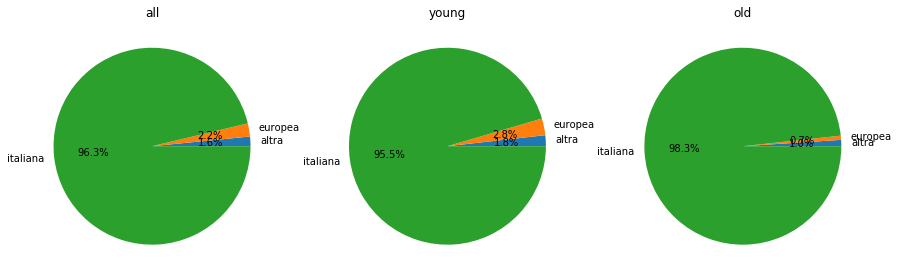

Sì                  956
Nessuna risposta     40
No                   23
Name: Sei nato in Italia?, dtype: int64


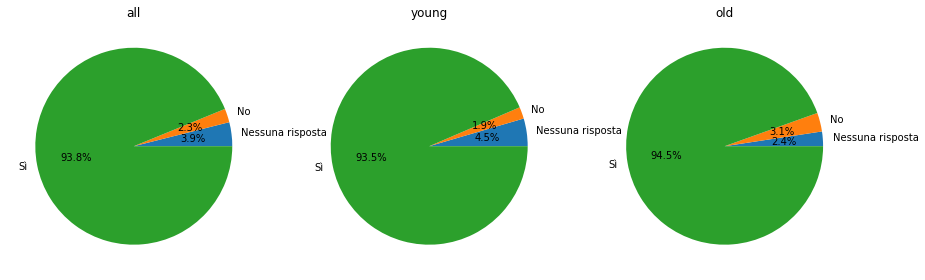

Roma                507
Varese              169
Perugia              78
Nessuna risposta     61
Foggia               26
Milano               21
Napoli               13
Como                 11
Genova                9
Cosenza               9
Salerno               9
Bari                  7
Reggio Calabria       6
Monza Brianza         5
Palermo               5
Brindisi              4
Ancona                4
Potenza               3
Bologna               3
Torino                3
Novara                3
L'Aquila              3
Agrigento             3
Latina                3
Caserta               3
Catanzaro             3
Frosinone             2
Alessandria           2
Lecce                 2
Siena                 2
                   ... 
Verona                2
Trieste               2
Vicenza               2
Taranto               2
Ferrara               1
Macerata              1
Cuneo                 1
Bergamo               1
Messina               1
Sassari               1
Rieti           

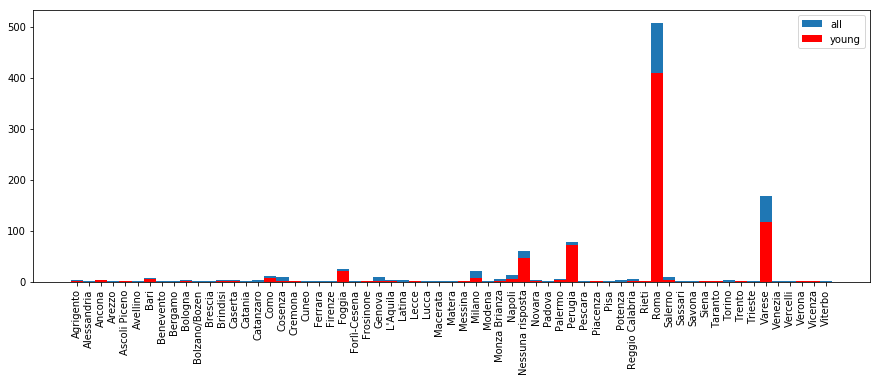

Roma                     621
Varese                   191
Perugia                   84
Como                      25
Foggia                    23
Genova                    11
Cosenza                    6
Ancona                     5
Milano                     4
Barletta-Andria-Trani      3
Bari                       3
Bologna                    3
Palermo                    3
Latina                     3
Firenze                    2
Ferrara                    2
Siena                      2
Alessandria                2
Trieste                    2
Monza e della Brianza      2
Vercelli                   2
Agrigento                  2
Rovigo                     1
Udine                      1
Vicenza                    1
Brescia                    1
Cremona                    1
Pordenone                  1
Potenza                    1
Cuneo                      1
Bergamo                    1
Rieti                      1
Savona                     1
Arezzo                     1
Lecce         

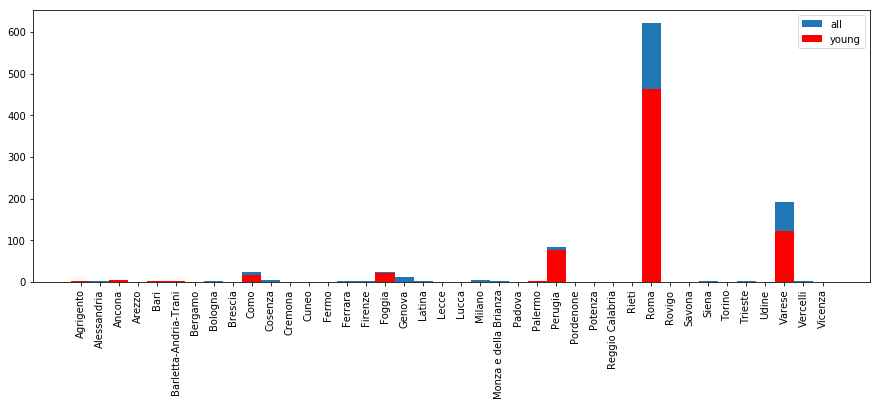

licenza di scuola secondaria di primo grado                                                                       579
laurea vecchio ordinamento                                                                                        117
scuola primaria                                                                                                   116
diploma di istituto tecnico                                                                                        54
licenza liceale                                                                                                    46
laurea magistrale biennale                                                                                         29
dottorato                                                                                                          21
laurea di primo livello                                                                                            19
diploma di istituto professionale                       

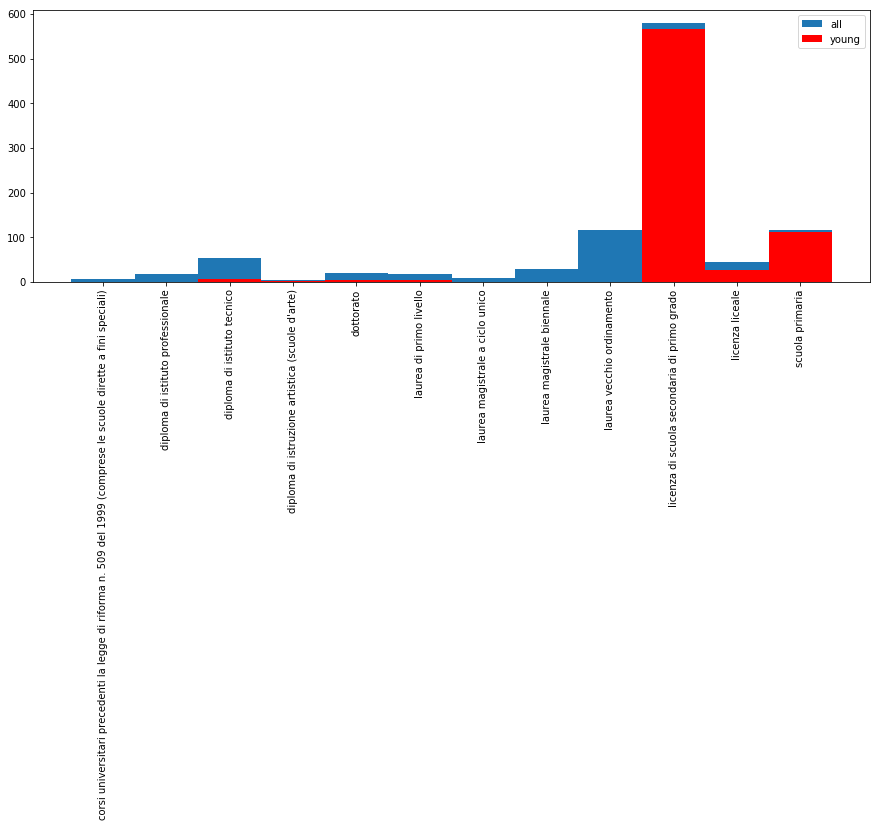

italiana    952
europea      35
altra        32
Name: Cittadinanza del padre, dtype: int64


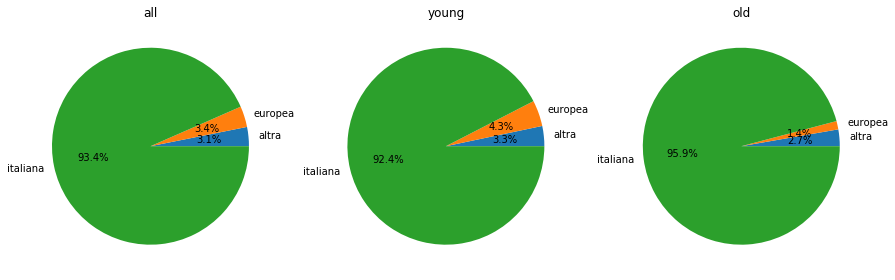

Sì                  921
Nessuna risposta     69
No                   29
Name: Tuo padre è nato in Italia?, dtype: int64


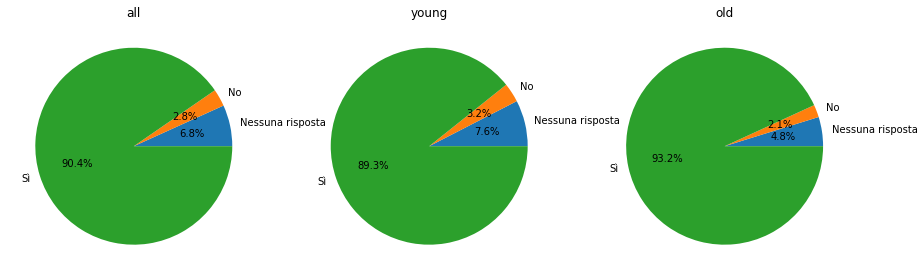

Roma                    343
Varese                  125
Nessuna risposta         96
Perugia                  65
Napoli                   33
Foggia                   27
Milano                   24
Reggio Calabria          14
Salerno                  12
Palermo                  11
Frosinone                11
Cosenza                  10
Como                     10
L'Aquila                  9
Catanzaro                 9
Taranto                   8
Avellino                  8
Messina                   8
Caserta                   8
Bari                      8
Genova                    7
Latina                    7
Potenza                   6
Campobasso                6
Lecce                     6
Terni                     6
Benevento                 5
Catania                   5
Trieste                   5
Siracusa                  5
                       ... 
Crotone                   2
Trento                    2
Parma                     2
Pesaro e Urbino           2
Treviso             

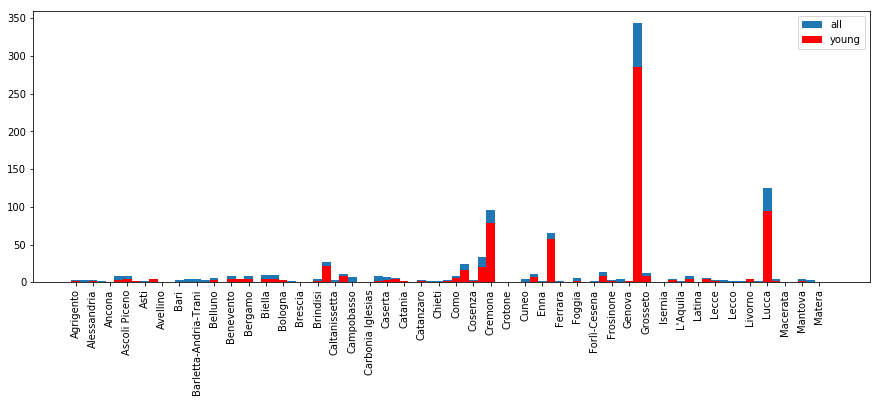

italiana    942
europea      42
altra        35
Name: Cittadinanza della madre, dtype: int64


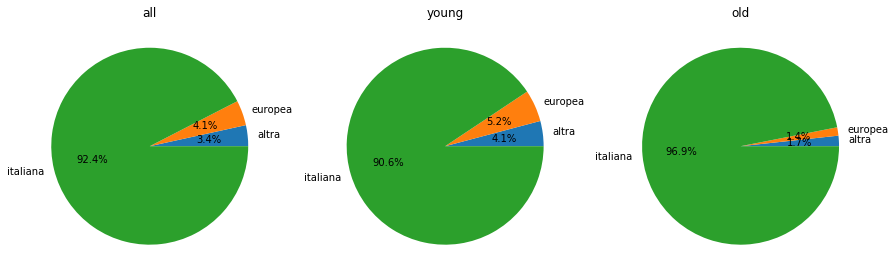

Sì                  904
Nessuna risposta     79
No                   36
Name: Tua madre è nata in Italia?, dtype: int64


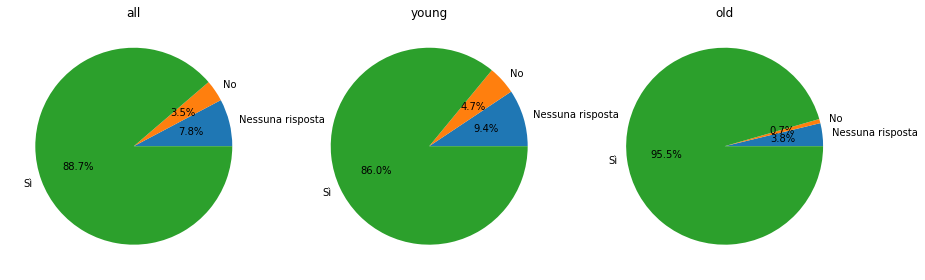

Roma                     343
Varese                   125
Nessuna risposta         113
Perugia                   64
Napoli                    29
Foggia                    26
Milano                    26
Bari                      14
Cosenza                   12
Como                      11
Avellino                  10
Potenza                   10
L'Aquila                  10
Caserta                   10
Salerno                    9
Reggio Calabria            9
Venezia                    9
Frosinone                  8
Catanzaro                  8
Palermo                    8
Genova                     7
Lecce                      7
Padova                     6
Ancona                     6
Brindisi                   5
Agrigento                  5
Cagliari                   5
Viterbo                    4
Terni                      4
Brescia                    4
                        ... 
Mantova                    2
Crotone                    2
Siena                      2
Ravenna       

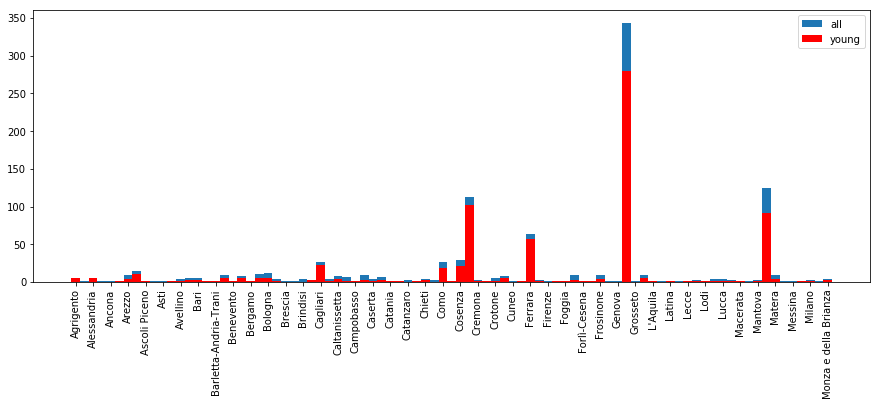

Sì    989
No     30
Name: Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?, dtype: int64


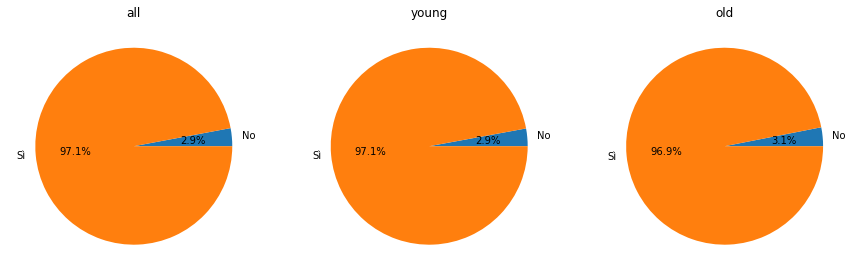

Tutti i giorni                   546
Più di due volte a settimana     325
Meno di due volte a settimana     94
Nessuna risposta                  30
Meno di una volta al mese         24
Name: Negli ultimi 12 mesi quante volte hai cercato informazioni?, dtype: int64


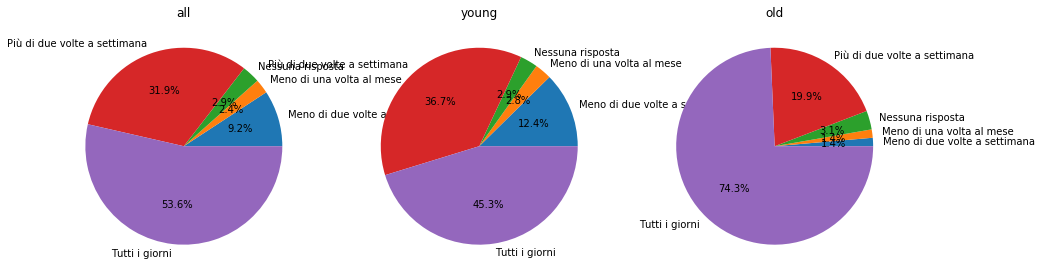

raramente                         518
mai                               257
spesso                            188
Nessuna risposta                   30
sempre                             19
mai, raramente, spesso, sempre      2
mai, raramente                      2
mai, spesso                         1
mai, raramente, spesso              1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)], dtype: int64


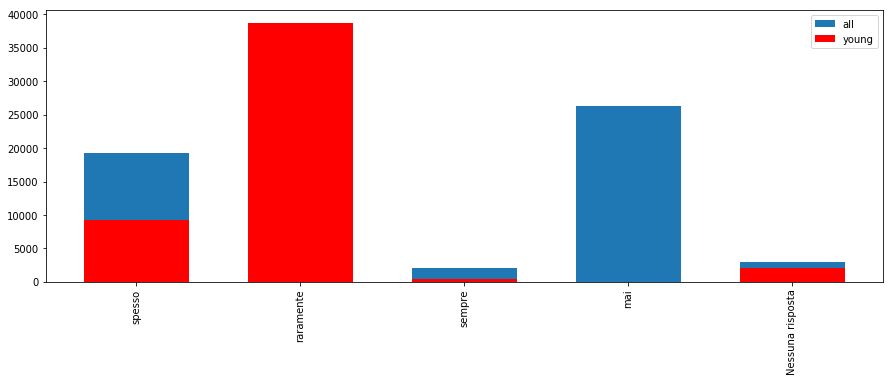

spesso                            463
raramente                         325
mai                               108
sempre                             85
Nessuna risposta                   30
raramente, spesso                   3
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
spesso, sempre                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)], dtype: int64


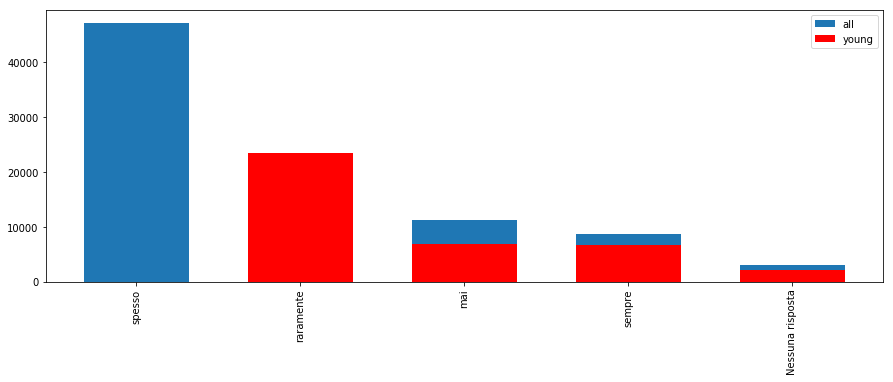

raramente                         394
mai                               339
spesso                            210
sempre                             36
Nessuna risposta                   30
mai, raramente                      5
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
spesso, sempre                      1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)], dtype: int64


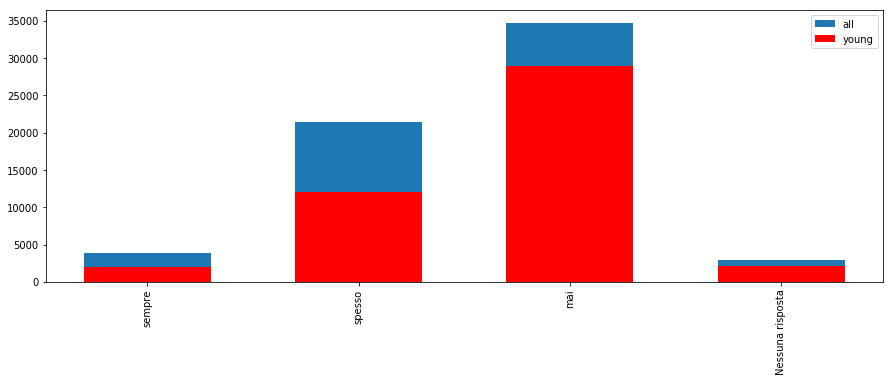

spesso                            564
raramente                         261
sempre                            118
Nessuna risposta                   30
mai                                30
raramente, spesso                   7
spesso, sempre                      3
mai, raramente, spesso, sempre      2
mai, spesso                         2
mai, raramente                      1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)], dtype: int64


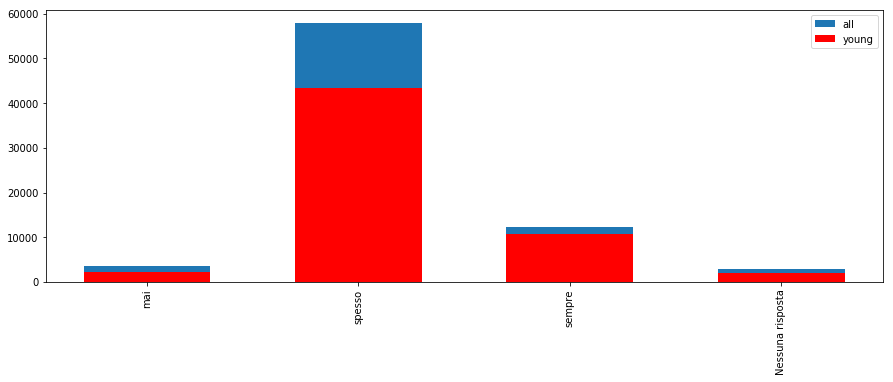

sempre                            623
spesso                            330
Nessuna risposta                   30
raramente                          19
mai                                 7
spesso, sempre                      4
mai, raramente, spesso, sempre      2
mai, spesso, sempre                 1
mai, spesso                         1
mai, raramente, spesso              1
mai, sempre                         1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet], dtype: int64


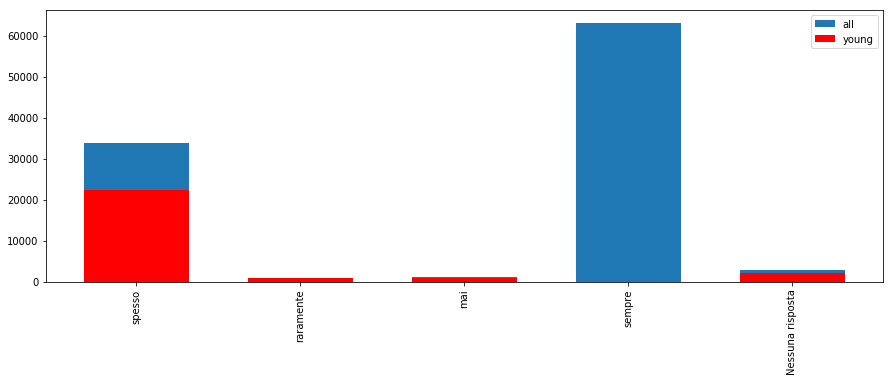

mai                               423
raramente                         374
spesso                            134
sempre                             41
Nessuna risposta                   30
mai, raramente                      7
raramente, spesso                   6
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro], dtype: int64


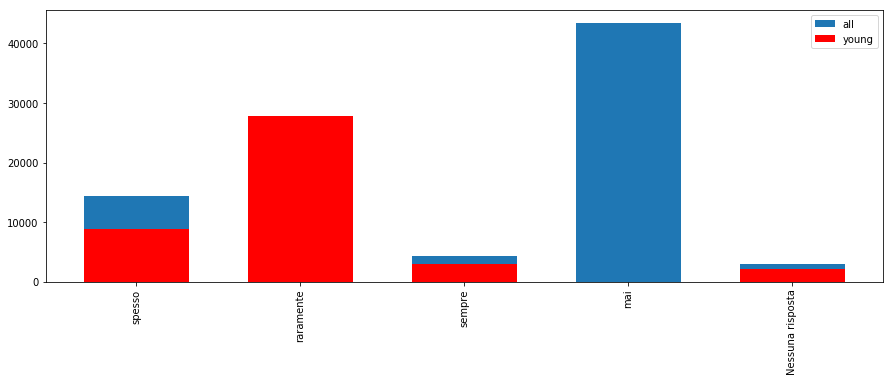

Internet            830
Persone              52
Carta                52
Tv                   35
Nessuna risposta     30
Altro                11
Radio                 9
Name: Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? , dtype: int64


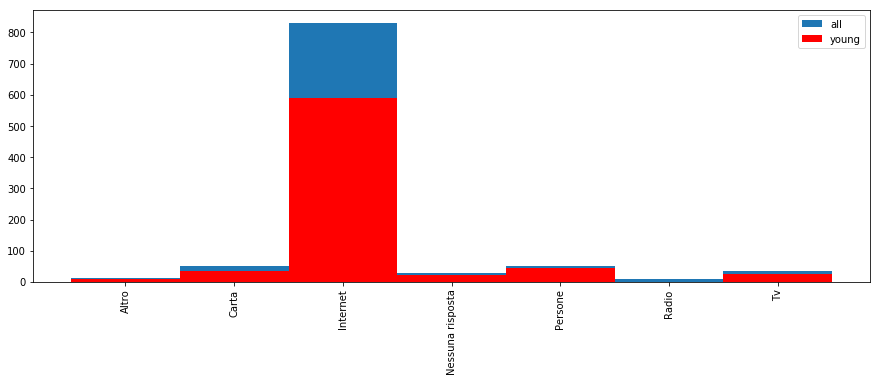

circa 30 minuti      434
meno di 10 minuti    315
circa 1 ora          158
più di un'ora         82
Nessuna risposta      30
Name: Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?, dtype: int64


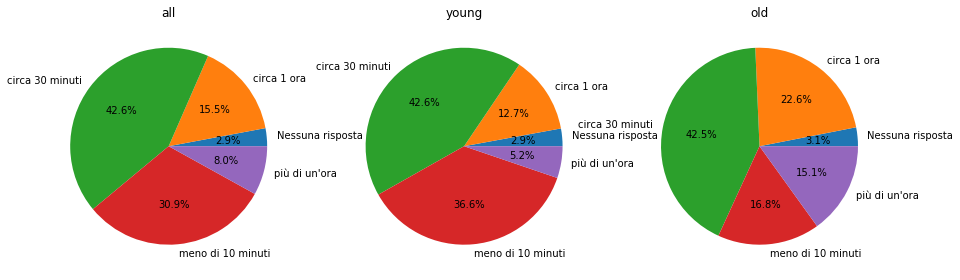

terrorismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori             154
altro                                                                                  84
catastrofi naturali                                                                    75
bullismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori                72
terrorismo, violenze e/o abusi sui minori, catastrofi naturali                         67
terrorismo                                                                             64
terrorismo, catastrofi naturali                                                        61
terrorismo, violenze e/o abusi sulle donne, catastrofi naturali                        60
violenze e/o abusi sulle donne, violenze e/o abusi sui minori, catastrofi naturali     50
violenze e/o abusi sulle donne, violenze e/o abusi sui minori                          41
violenze e/o abusi sui minori                                                          31
Nessuna ri

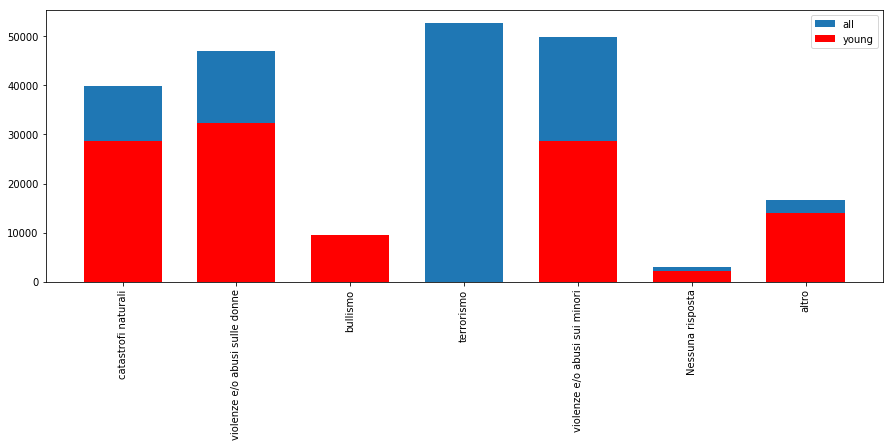

settimanalmente     381
mensilmente         273
giornalmente        172
praticamente mai    163
Nessuna risposta     30
Name: Con che frequenza ti informi su argomenti riguardanti la scienza?, dtype: int64


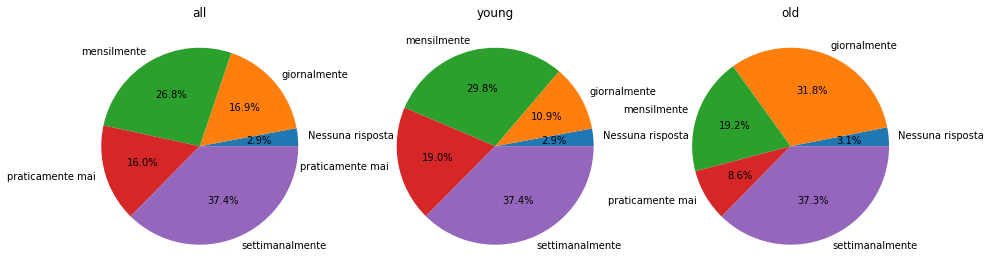

Nessuna risposta                                                   193
astronomia, curiosità scientifiche, tecnologia, innovazione         42
medicina, curiosità scientifiche, tecnologia, innovazione           39
medicina, ecologia/clima, tecnologia, innovazione                   39
ecologia/clima, curiosità scientifiche, tecnologia, innovazione     35
medicina, ecologia/clima, curiosità scientifiche                    21
tecnologia, innovazione                                             21
ecologia/clima, astronomia, tecnologia, innovazione                 20
ecologia/clima, astronomia, curiosità scientifiche                  19
curiosità scientifiche                                              16
astronomia                                                          16
medicina, curiosità scientifiche, biologia                          16
ecologia/clima, curiosità scientifiche, biologia                    15
medicina                                                            15
medici

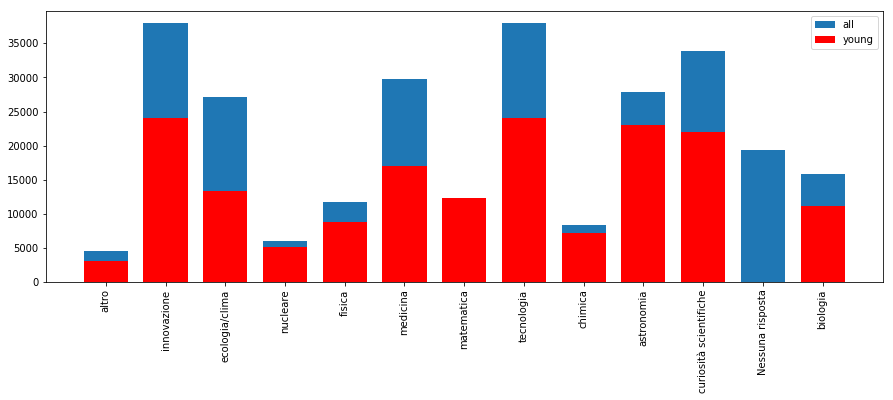

commenti e discussioni riguardo la notizia                                                                                                                                                                                                                       180
i video                                                                                                                                                                                                                                                          108
non so                                                                                                                                                                                                                                                            59
i titoli delle testate giornalistiche                                                                                                                                                                                    

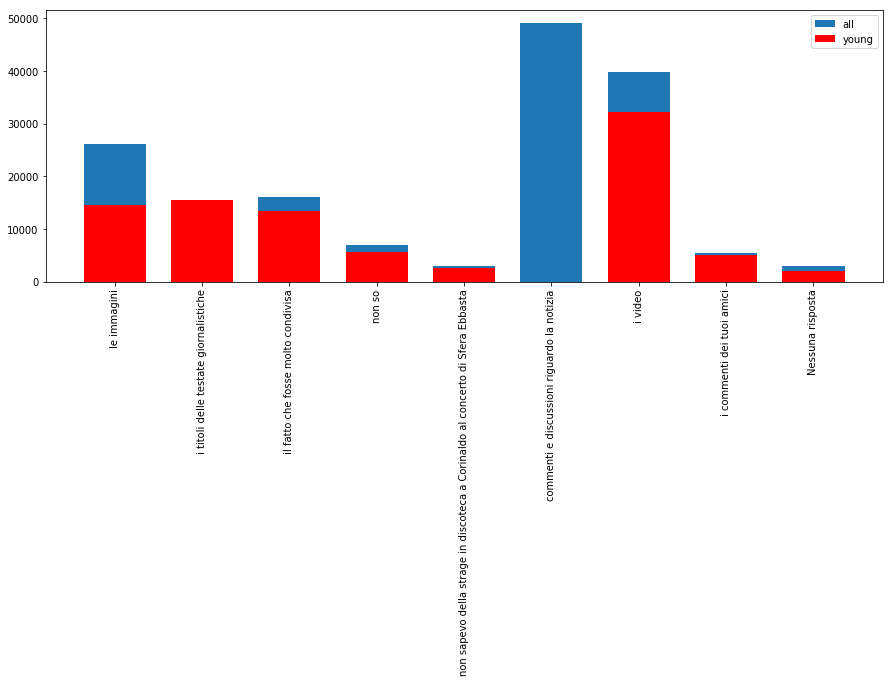

dalla tv                                                                                                                                                            543
da internet                                                                                                                                                          95
da internet, dalla tv                                                                                                                                                91
dalla tv, da una persona che ne parlava                                                                                                                              42
dalla radio                                                                                                                                                          41
da una persona che ne parlava                                                                                                                                   

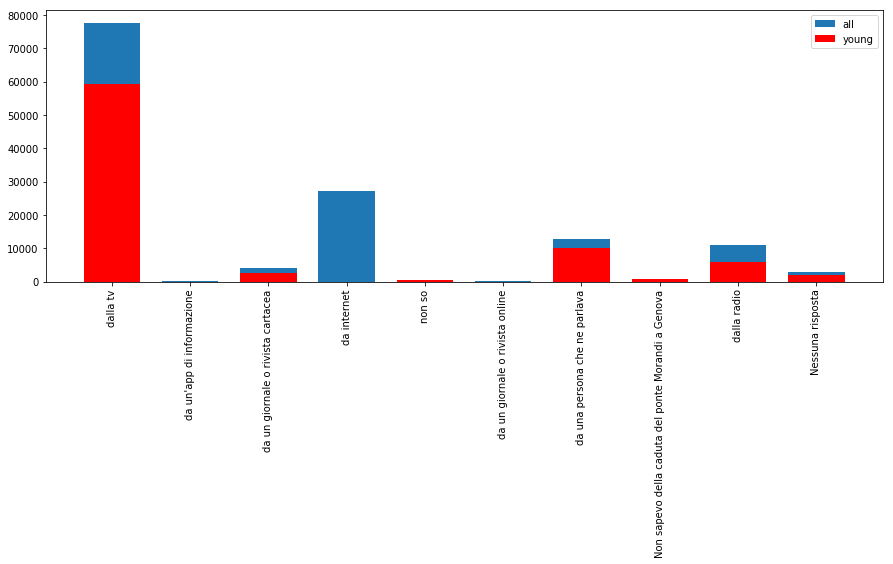

Sì                  978
Nessuna risposta     30
No                   11
Name: Hai mai usato internet?, dtype: int64


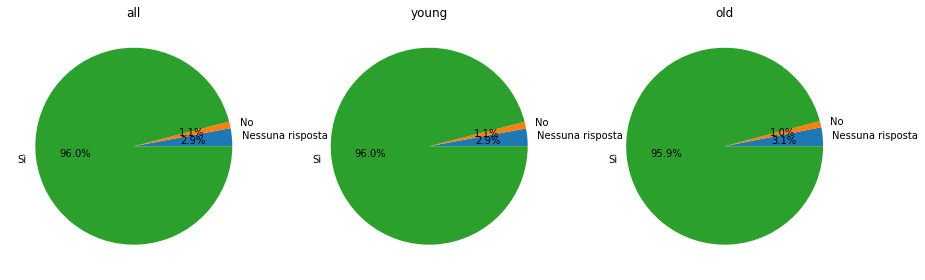

spesso                            430
raramente                         301
sempre                            141
mai                               109
Nessuna risposta                   31
mai, raramente, spesso, sempre      2
mai, raramente                      2
raramente, spesso, sempre           1
mai, spesso                         1
spesso, sempre                      1
Name: Sul web, dove prendi le informazioni? [testate giornalistiche online], dtype: int64


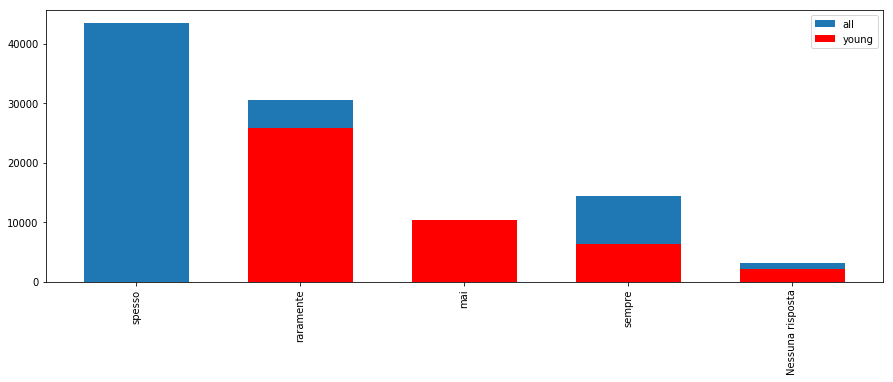

spesso                            393
raramente                         269
sempre                            176
mai                               141
Nessuna risposta                   31
spesso, sempre                      3
mai, raramente, spesso, sempre      2
mai, raramente                      2
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [social], dtype: int64


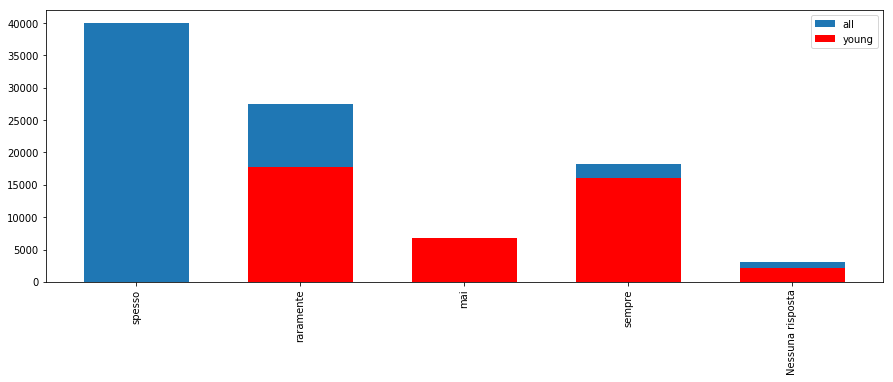

spesso                            457
sempre                            454
raramente                          49
Nessuna risposta                   31
mai                                18
spesso, sempre                      5
mai, raramente, spesso, sempre      2
raramente, spesso, sempre           1
raramente, spesso                   1
raramente, sempre                   1
Name: Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping], dtype: int64


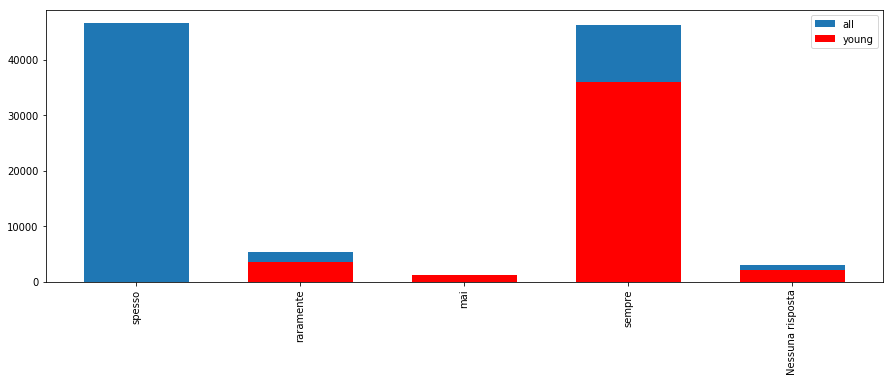

spesso                            388
raramente                         313
sempre                            147
mai                               132
Nessuna risposta                   31
mai, raramente, spesso, sempre      2
spesso, sempre                      2
raramente, spesso, sempre           1
mai, spesso                         1
mai, raramente                      1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [siti specifici che conosco], dtype: int64


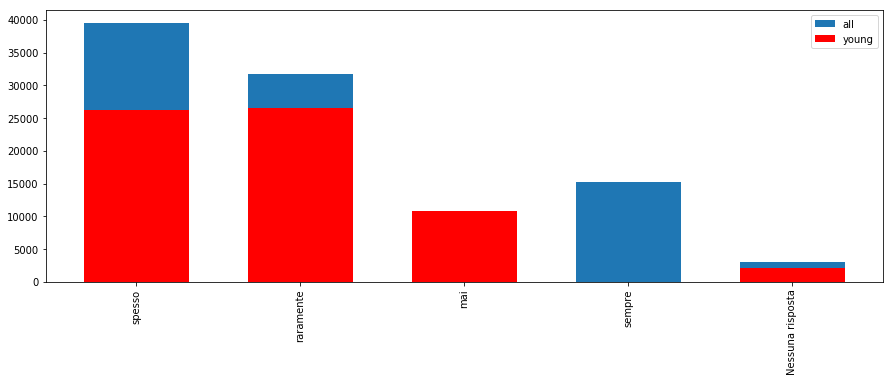

mai                               438
raramente                         325
spesso                            165
sempre                             46
Nessuna risposta                   31
mai, raramente                      8
mai, raramente, spesso, sempre      2
raramente, spesso, sempre           1
mai, spesso                         1
raramente, spesso                   1
mai, sempre                         1
Name: Sul web, dove prendi le informazioni? [app dedicate], dtype: int64


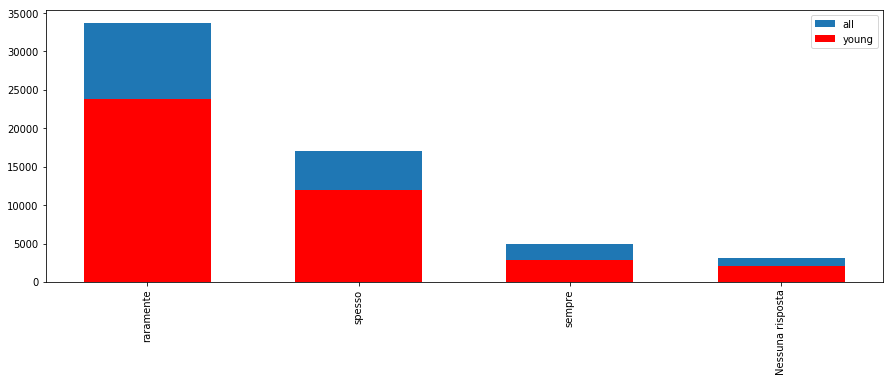

mai                               599
raramente                         246
spesso                            103
Nessuna risposta                   39
sempre                             23
mai, raramente                      5
mai, raramente, spesso, sempre      2
raramente, spesso                   2
Name: Sul web, dove prendi le informazioni? [newsletter via email], dtype: int64


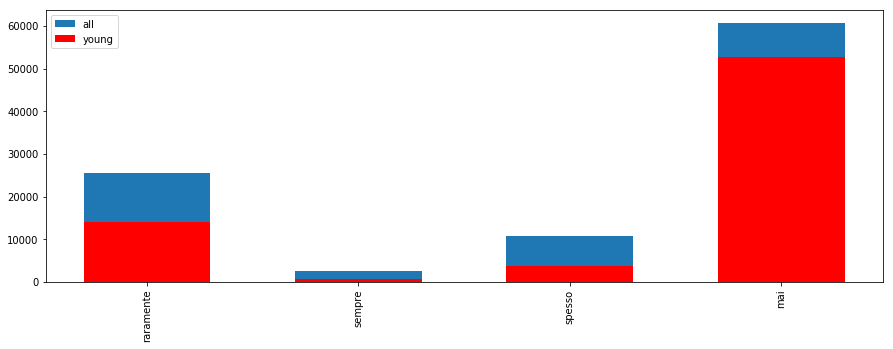

Instagram, Youtube                                                206
Altro                                                             109
Instagram                                                         104
Youtube                                                            72
Instagram, Youtube, Altro                                          61
Facebook                                                           56
Instagram, Facebook, Youtube                                       55
Facebook, Youtube                                                  44
Instagram, Facebook                                                43
Instagram, Altro                                                   33
Youtube, Altro                                                     32
Nessuna risposta                                                   31
Facebook, Youtube, Altro                                           12
Instagram, Facebook, Twitter                                       11
Facebook, Twitter   

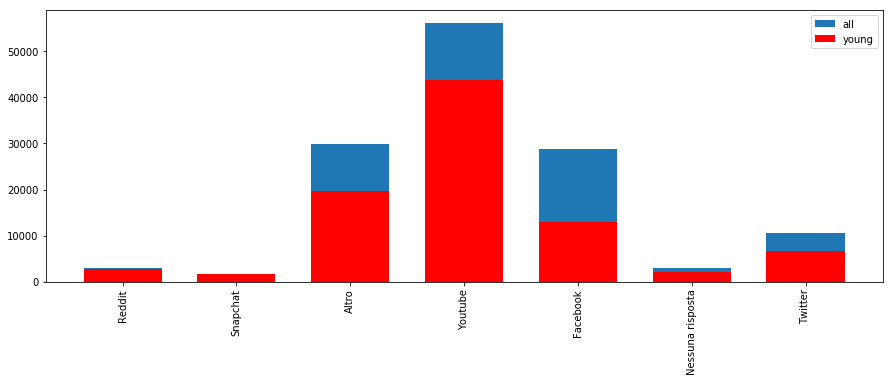

Instagram           402
Youtube             227
Facebook            153
Altro               152
Twitter              41
Nessuna risposta     31
Reddit               10
Snapchat              3
Name: Tra i social che usi di più anche per informati, quale preferisci?, dtype: int64


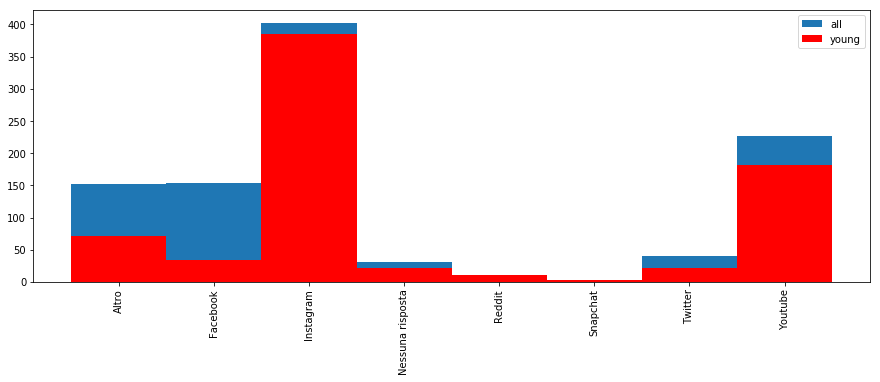

Nessuna risposta                                                                                                                                                                                          31
sport, film - serie tv, musica                                                                                                                                                                             9
altro                                                                                                                                                                                                      8
musica                                                                                                                                                                                                     7
gossip, shopping online, moda, film - serie tv, musica                                                                                                                              

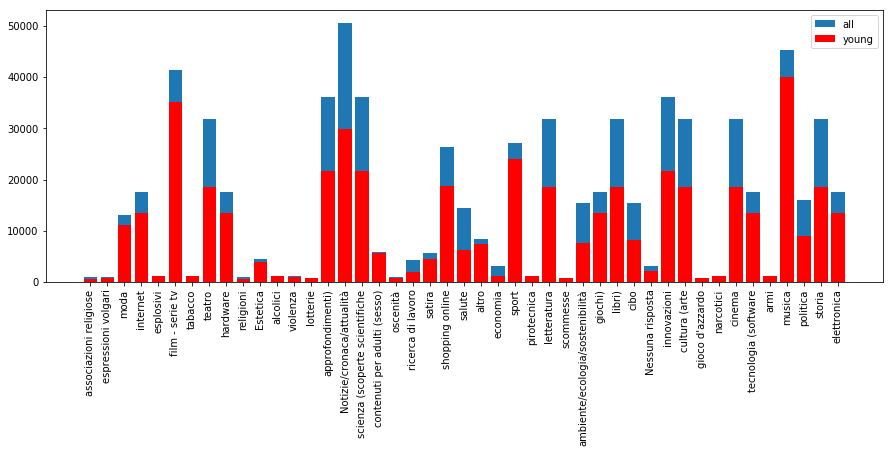

foto                270
news                228
memes               207
video               128
profili vari        118
Nessuna risposta     32
like/followers       28
classifiche           8
Name: Qual è la prima cosa che vai a vedere sui social?, dtype: int64


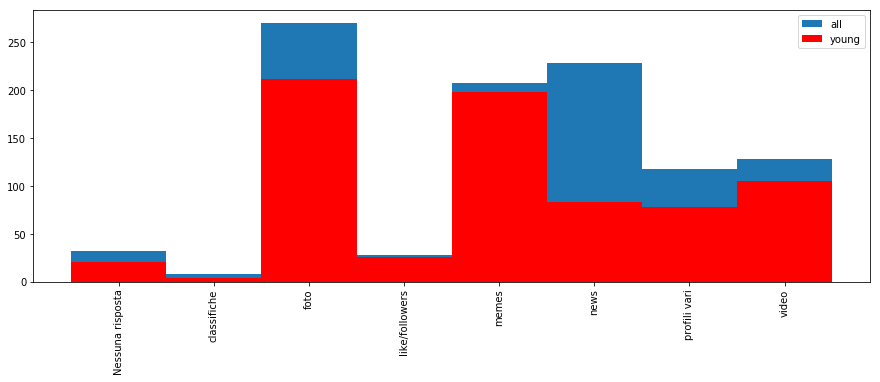

Da un motore di ricerca online (es google, bing, safari ...)                                                                                                                116
Non ne ricevo                                                                                                                                                               115
Da un'app di news (es google news, apple news...)                                                                                                                            88
Dalle Home dei social                                                                                                                                                        60
Dai video proposti su Youtube                                                                                                                                                39
Da un'app di messaggistica istantanea (WhatsApp, Messanger...)                                                          

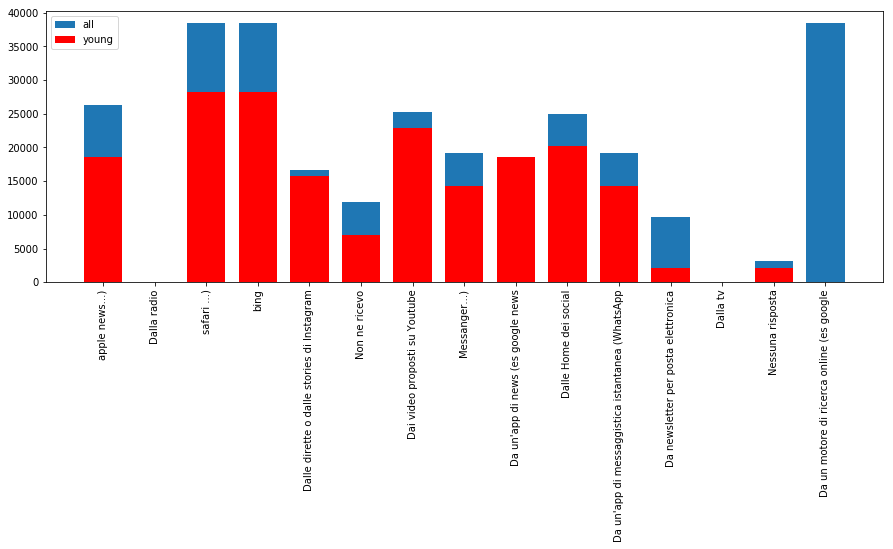

Nessuna risposta                                                                                                                                                                                31
shopping online                                                                                                                                                                                 29
altro                                                                                                                                                                                           28
Notizie/cronaca/attualità                                                                                                                                                                       22
Notizie/cronaca/attualità, shopping online                                                                                                                                                      12
sport                    

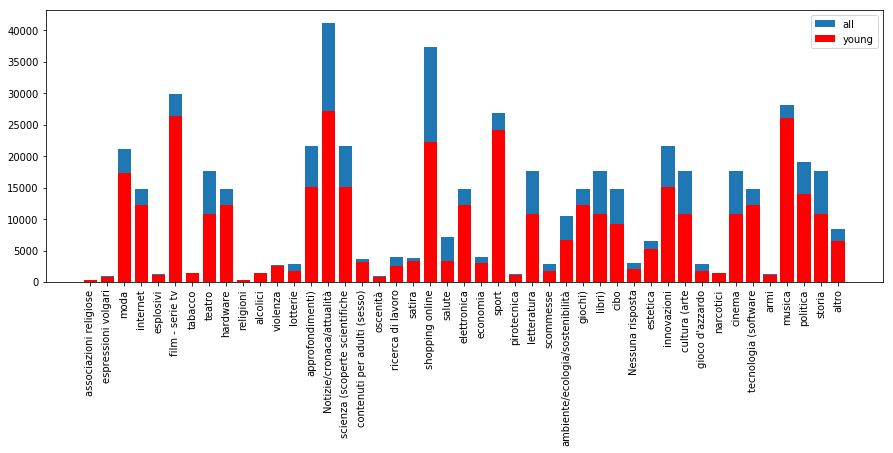

l'argomento che tratta                                                                                                                325
il titolo, l'argomento che tratta                                                                                                     148
il titolo                                                                                                                             108
il titolo, la grafica, l'argomento che tratta                                                                                          47
l'argomento che tratta, commenti e discussioni riguardo la notizia                                                                     41
la grafica, l'argomento che tratta                                                                                                     33
Nessuna risposta                                                                                                                       31
il titolo, la grafica             

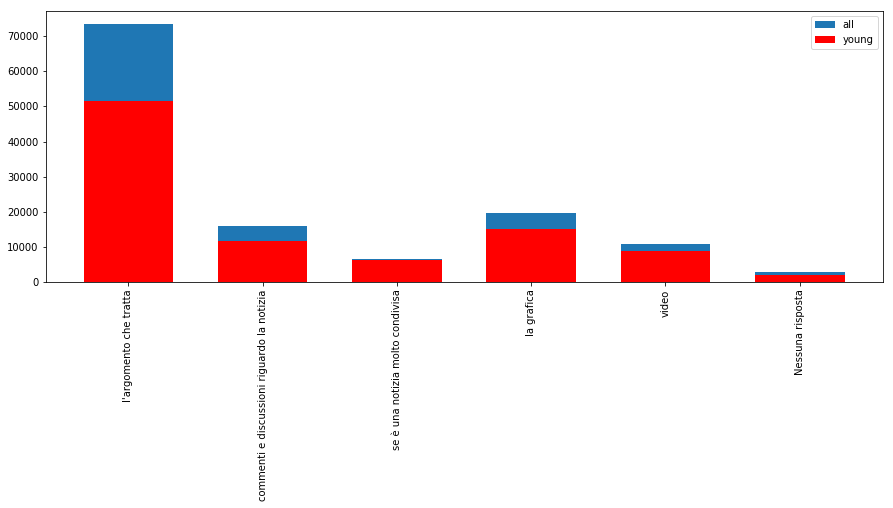

raramente           468
spesso              316
mai                 169
sempre               35
Nessuna risposta     31
Name: Condividi le notizie?, dtype: int64


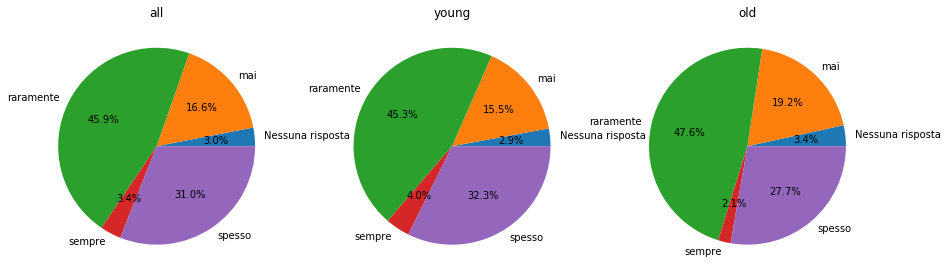

famiglia, amici più stretti                                                                                 208
Nessuna risposta                                                                                            199
amici più stretti                                                                                           127
famiglia, amici più stretti, gruppi con lo stesso interesse                                                  78
tutti, attraverso post pubblici                                                                              58
famiglia                                                                                                     53
amici più stretti, gruppi con lo stesso interesse                                                            51
gruppi con lo stesso interesse                                                                               34
famiglia, amici più stretti, conoscenti                                                                 

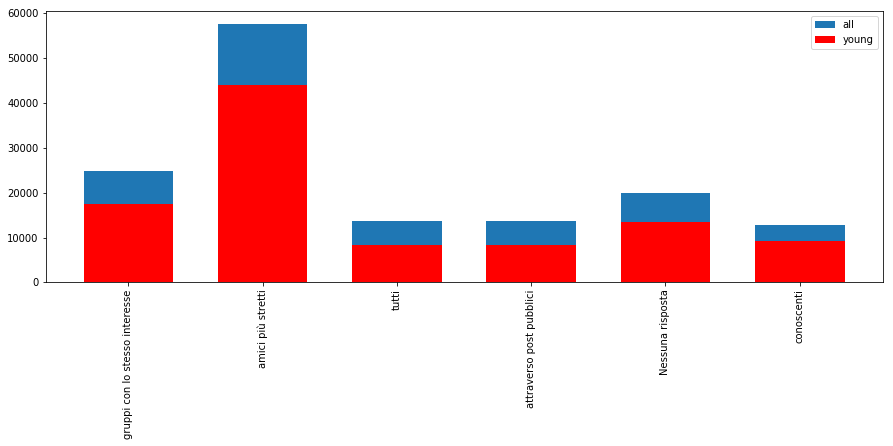

con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce                                              279
Nessuna risposta                                                                                                     209
ne parlo a voce                                                                                                      153
con un'app di messaggistica istantanea (whatsapp, SMS)                                                               143
con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce, postando e commentando sui social            55
postando e commentando sui social                                                                                     53
ne parlo a voce, postando e commentando sui social                                                                    44
con un'app di messaggistica istantanea (whatsapp, SMS), postando e commentando sui social                             36
altro                           

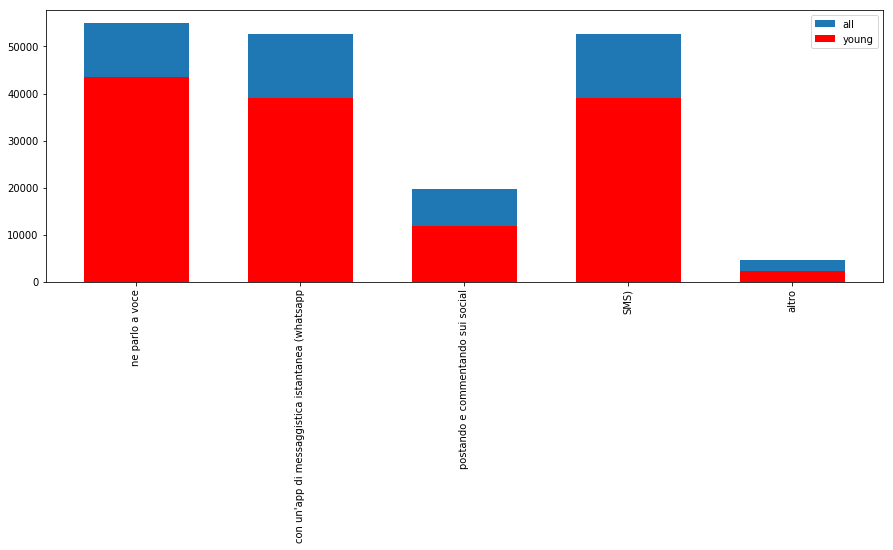

molto               371
abbastanza          371
Nessuna risposta    209
poco                 55
mai per questo       13
Name: Quando condividi lo fai ...  [Perché è una notizia che mi ha impressionato], dtype: int64


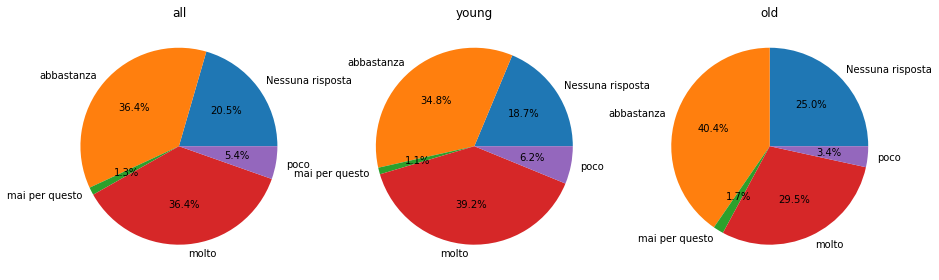

abbastanza          301
poco                264
Nessuna risposta    209
mai per questo      132
molto               113
Name: Quando condividi lo fai ...  [Per farlo sapere a tutti], dtype: int64


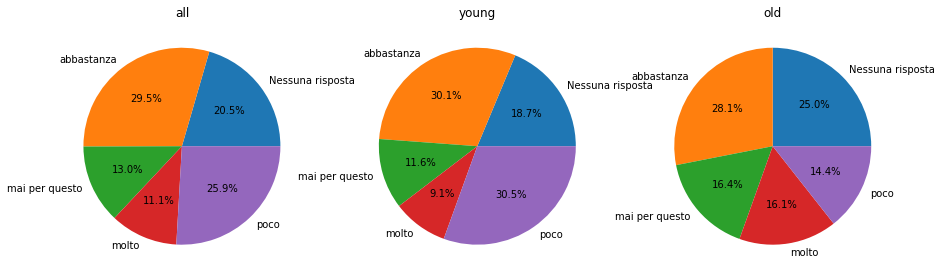

poco                283
abbastanza          280
Nessuna risposta    209
mai per questo      179
molto                68
Name: Quando condividi lo fai ...  [Per commentare], dtype: int64


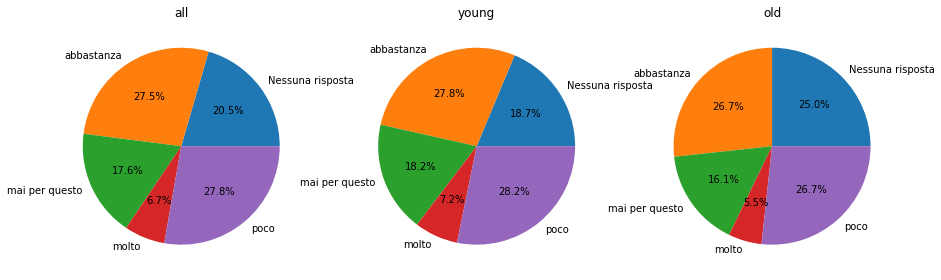

mai per questo      697
Nessuna risposta    209
poco                 92
abbastanza           15
molto                 6
Name: Quando condividi lo fai ...  [Perché lo fanno tutti], dtype: int64


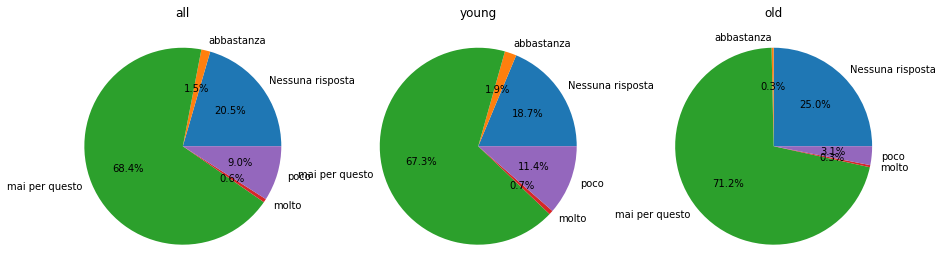

dipende dal giornale o dalla fonte    772
generalmente no                        95
generalmente si                        93
Nessuna risposta                       30
non saprei/non mi interessa            29
Name: Secondo te ci si può fidare di ciò che scrivono i giornalisti?, dtype: int64


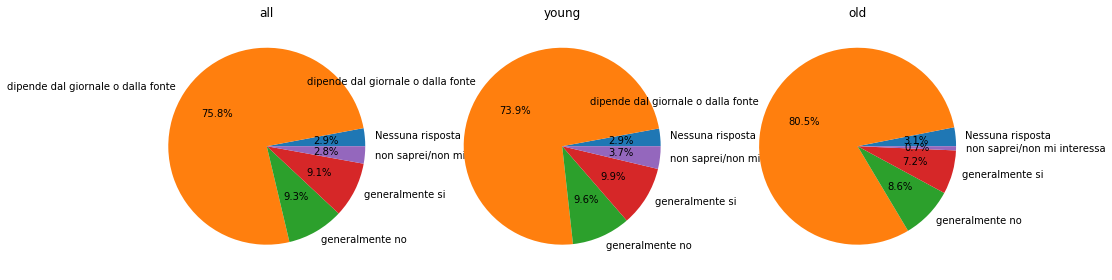

dipende dalla notizia          698
generalmente no                168
generalmente si                104
Nessuna risposta                30
non saprei/non mi interessa     19
Name: Secondo te ci si può fidare delle notizie che si trovano su internet?, dtype: int64


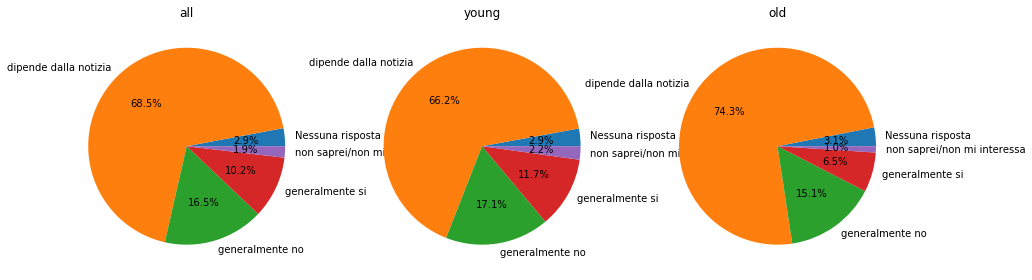

si                  345
dipende             343
no                  194
non lo so           107
Nessuna risposta     30
Name: Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?, dtype: int64


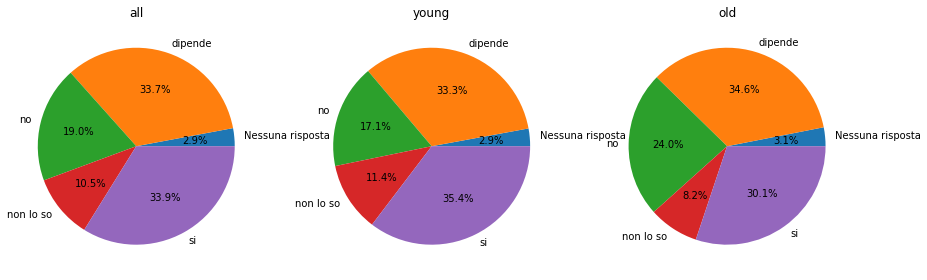

abbastanza          472
poco                299
molto               117
per niente          101
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta], dtype: int64


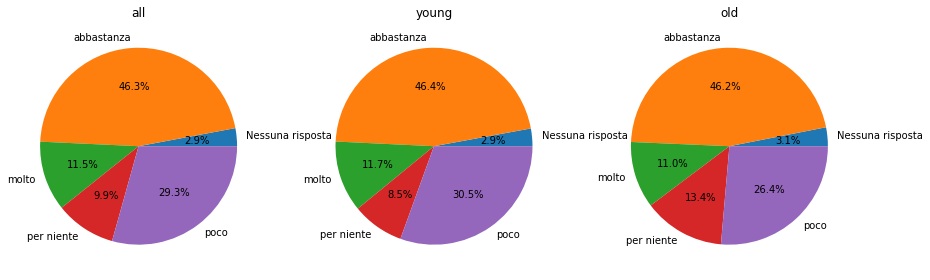

abbastanza          464
molto               407
poco                 93
Nessuna risposta     30
per niente           25
Name: Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento], dtype: int64


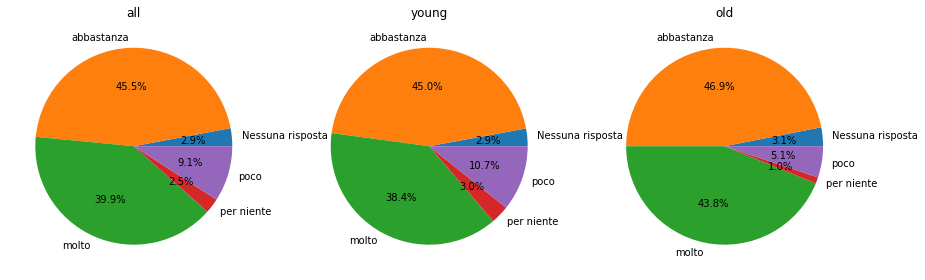

abbastanza          385
poco                358
per niente          126
molto               120
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia], dtype: int64


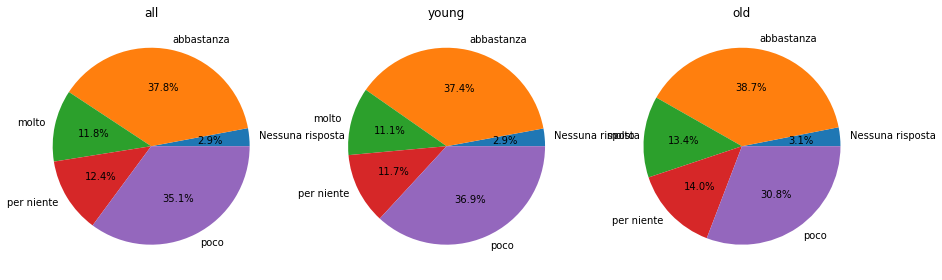

molto               446
abbastanza          418
poco                 98
Nessuna risposta     30
per niente           27
Name: Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)], dtype: int64


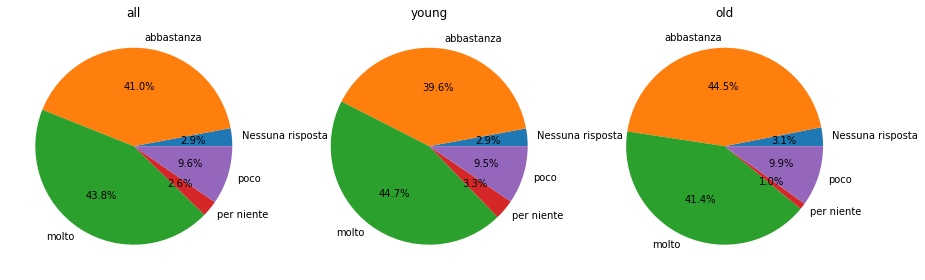

poco                419
abbastanza          289
per niente          223
molto                58
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile], dtype: int64


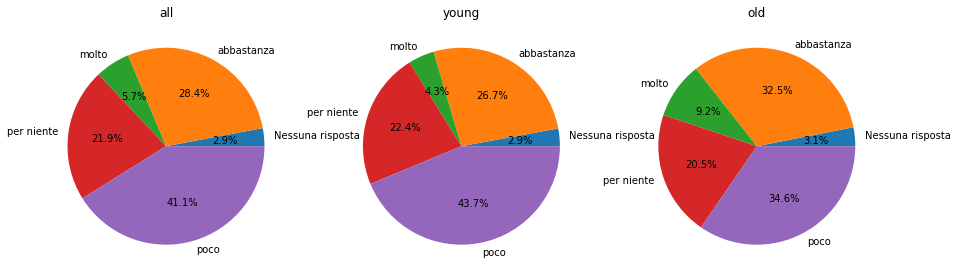

per niente          376
poco                326
abbastanza          201
molto                86
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [altro], dtype: int64


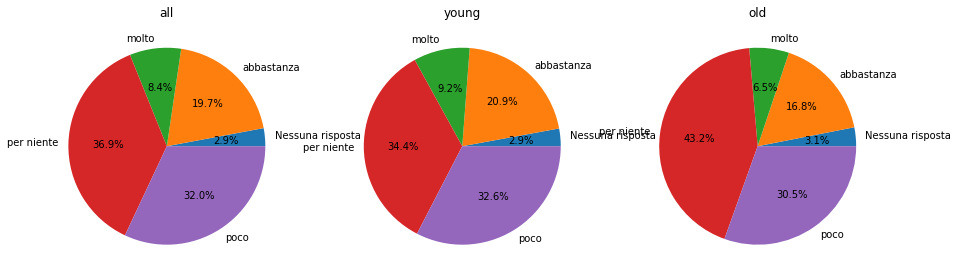

Facebook                                                                                                                                                               64
Facebook, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                                            44
Facebook, blog e siti vari                                                                                                                                             40
Facebook, blog e siti vari, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                          40
blog e siti vari                                                                                                                                                       33
Nessuna risposta                                                                                                                                      

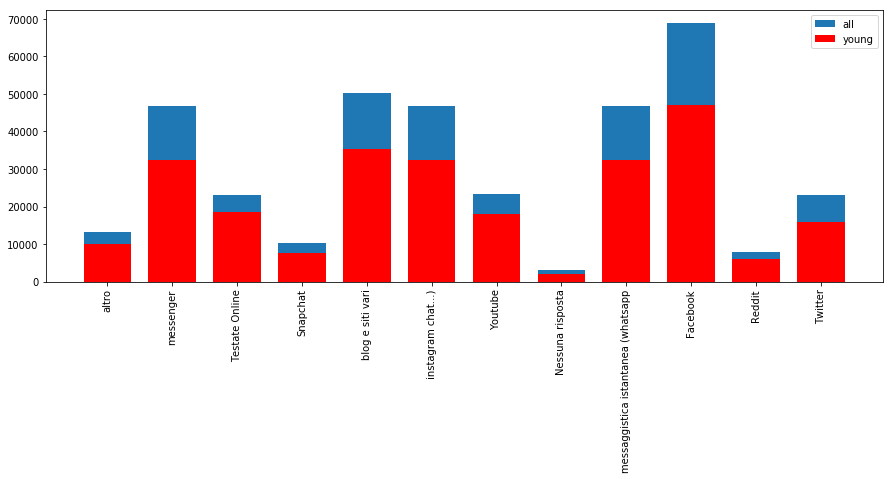

Notizie/cronaca/attualità                                                                                                                                                                  53
gossip                                                                                                                                                                                     34
Nessuna risposta                                                                                                                                                                           30
Notizie/cronaca/attualità, gossip                                                                                                                                                          30
Notizie/cronaca/attualità, politica, gossip                                                                                                                                                27
Notizie/cronaca/attualità, politica               

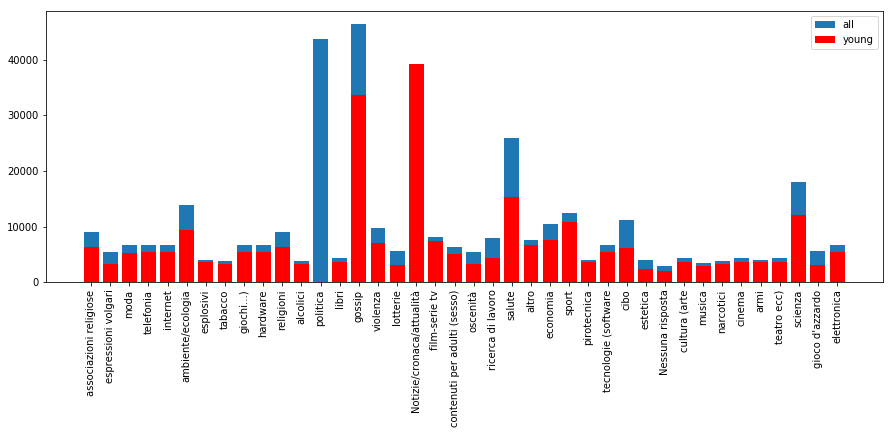

tra 15 e 20         285
tra 10 e 14         229
sopra i 50          159
tra 21 e 30         110
tra 41 e 50          94
tra 31 e 40          65
meno di 10 anni      47
Nessuna risposta     30
Name: Secondo te a che età si è più inclini a condividere una fake news?, dtype: int64


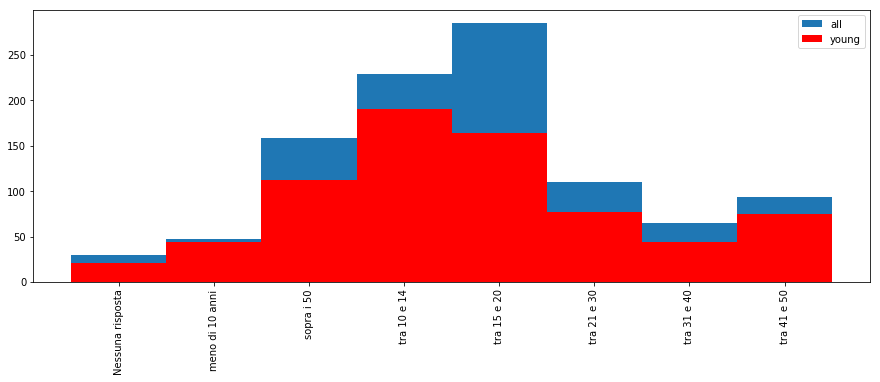

si                  495
no                  429
non mi interessa     65
Nessuna risposta     30
Name: Sai cos'è la reputazione digitale?, dtype: int64


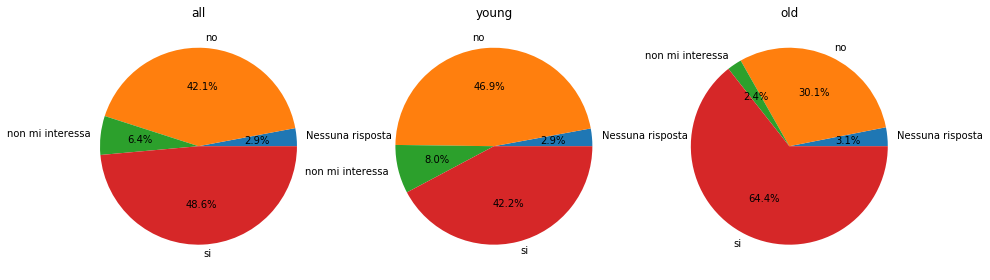

si                              876
lo so, ma non mi interessa       71
no                               34
Nessuna risposta                 30
non lo so e non mi interessa      8
Name: Sai quali pericoli potrebbero esserci nel postare le foto sui social?, dtype: int64


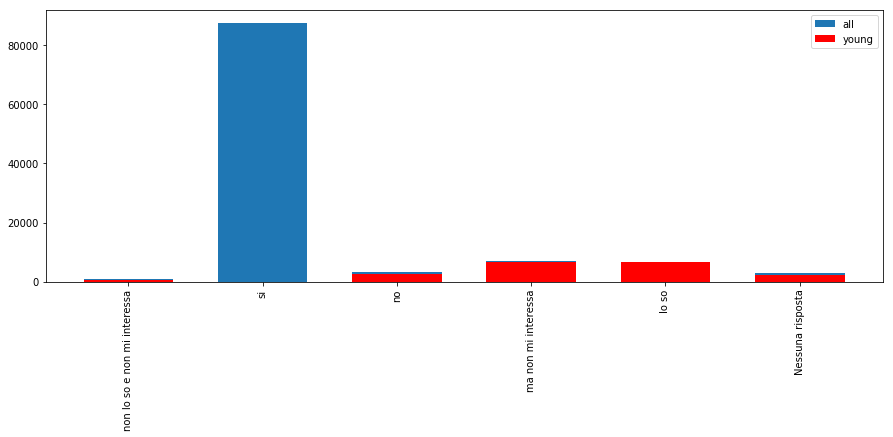

1    727
0    292
Name: giovani, dtype: int64


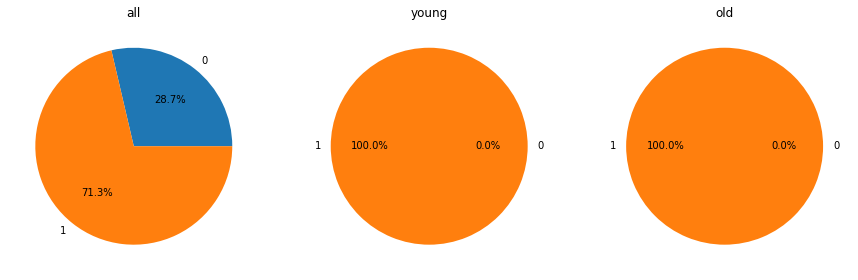

-1    1019
Name: multiple, dtype: int64


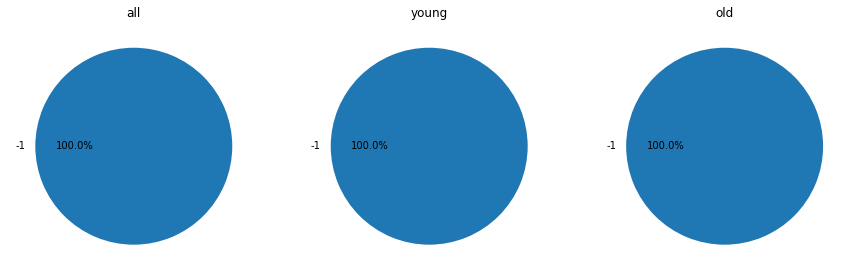

In [155]:
def multiple_choice(question, db):
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  for i in range (1, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(100*multiple_answar[multiple_answar.columns[i]].sum())
  return values, labels



show_as_pie = 6
show_as_hist = 40

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  print (df[df.columns[i]].value_counts())
  df["multiple"]=df[df.columns[i]].astype(str).str.find(',')
  if np.max(df["multiple"])>-1:
    plt.figure(figsize=(15,5))
    values,labels = multiple_choice(question=df.columns[i], db=df)
    values_y,labels_y = multiple_choice(question=df.columns[i], db=giovani)

    all_lables = labels + labels_y
    all_lables = list(set(all_lables))
    all_values=np.zeros(len(all_lables))
    all_values_y=np.zeros(len(all_lables))
    for i in range(0, len(all_lables)):
      if all_lables[i] in labels:
        all_values[i] = values[labels.index(all_lables[i])]
      if all_lables[i] in labels_y:
        all_values_y[i] = values_y[labels_y.index(all_lables[i])]
    
    x = np.linspace(0,len(all_lables),len(all_lables))
    plt.bar(x, np.array(all_values), label='all')
    plt.bar(x, np.array(all_values_y), color='red', label='young')
    plt.xticks(x, all_lables, rotation='vertical')
    #plt.ylabel('percentage [%]')
    plt.legend()
  else:
    ordinal_encoder = OrdinalEncoder()
    ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
    ordinated_encoded_young = ordinated_encoded[df.giovani==1]
    ordinated_encoded_old = ordinated_encoded[df.giovani==0]
    labels = np.array(ordinal_encoder.categories_[0])
    if len(ordinal_encoder.categories_[0])<show_as_pie :
      fig, ax = plt.subplots(1,3, figsize=(15, 5))
      val, _ = np.histogram(ordinated_encoded, bins=len(labels))
      ax[0].pie(val, labels=labels, autopct='%1.1f%%')
      ax[0].set_title('all')
      val, _ = np.histogram(ordinated_encoded_young, bins=len(labels))
      ax[1].pie(val, labels=labels, autopct='%1.1f%%')
      ax[1].set_title('young')
      val, _ = np.histogram(ordinated_encoded_old, bins=len(labels))
      ax[2].pie(val, labels=labels, autopct='%1.1f%%')
      ax[2].set_title('old')
    else:
      cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
      if len(cat_num) > show_as_hist:
        cat_num = cat_num[::len(cat_num)//show_as_hist]
        labels = labels[::len(cat_num)//show_as_hist]
      plt.figure(figsize=(15,5))
      plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), label='all')
      plt.hist(ordinated_encoded_young, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), color='red', label='young')
      plt.xticks(cat_num-0.5,labels, rotation='vertical')
      plt.legend()
  plt.show()

In [161]:
q = 'Sai quali pericoli potrebbero esserci nel postare le foto sui social?'
q = 'Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]'
values,labels = multiple_choice(question=q, db=df)
values_y,labels_y = multiple_choice(question=q, db=giovani)
print (labels)
print (values, sum(values))
print (labels_y)
print (values_y, sum(values_y))
all_lables = labels + labels_y
all_lables = list(set(all_lables))
all_values=np.zeros(len(all_lables))
all_values_y=np.zeros(len(all_lables))
for i in range(0, len(all_lables)):
  if all_lables[i] in labels:
    all_values[i] = values[labels.index(all_lables[i])]
  if all_lables[i] in labels_y:
    all_values_y[i] = values_y[labels_y.index(all_lables[i])]

print (all_lables)
print (all_values)
print (all_values_y)

    

['sempre', 'Nessuna risposta', 'spesso', 'raramente']
[46300.0, 3100.0, 46600.0, 5400.0] 101400.0
['sempre', 'mai', 'raramente', 'Nessuna risposta']
[36000.0, 1200.0, 3500.0, 2100.0] 42800.0
['spesso', 'raramente', 'mai', 'sempre', 'Nessuna risposta']
[46600.  5400.     0. 46300.  3100.]
[    0.  3500.  1200. 36000.  2100.]


In [153]:
all = labels + labels_y
print (all)
all = list(set(all))
print(all.index('mai'))
print ('raramente' in labels)
type(labels.index(all_lables[2]))

['mai', 'spesso', 'sempre', 'Nessuna risposta', 'spesso', 'raramente', 'Nessuna risposta', 'sempre']
3
False


int

# example of dataset visualizzation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

In [0]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 

data are index in ASCI oder and must be reindex 

In [0]:
ordine_eta = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine_eta).plot(kind='bar')
plt.show() 

In [0]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine_eta, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

per passarlo ad algorirmi di machine lenrning e' necessario indicizzarlo corretamente

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine_eta])
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

In [0]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

In [0]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine_eta, rotation='vertical')
plt.show()
print(ordinal_encoder.categories_[0])


campi con rispote multiple: esempio con il campo "Quali argomenti ti vengono suggeriti mentre sei online"

In [0]:
question='Quali argomenti ti vengono suggeriti mentre sei online'
question='Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?'
df["multiple"]=df[question].str.find(',')
if np.max(df["multiple"])>-1:
  print (len(df[question].str.split(',\s*')))
np.max(df["multiple"])


-1

In [0]:
multiple_answar = df['Quali argomenti ti vengono suggeriti mentre sei online'].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
multiple_answar.hist(figsize=(20,15))

plt.show()

In [0]:
labels=[]
values=[]
plt.figure(figsize=(10,5))
for i in range (1, len(multiple_answar.columns)):
  #print(multiple_answar.columns[i], multiple_answar[multiple_answar.columns[i]].sum())
  labels.append(multiple_answar.columns[i])
  values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(df))
x = np.linspace(0,len(labels),len(labels))
plt.bar(x, np.array(values))
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('percentage')
plt.show()

In [0]:
def plot_multiple_choice(question, db, fsize):
  %matplotlib inline
  import matplotlib.pyplot as plt
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  plt.figure(figsize=fsize)
  for i in range (1, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(db))
  x = np.linspace(0,len(labels),len(labels))
  plt.bar(x, np.array(values))
  plt.xticks(x, labels, rotation='vertical')
  plt.ylabel('percentage [%]')
  plt.show()

plot_multiple_choice(question='Quali social usi di più per informarti?', db=df, fsize=(10,5))
